<a href="https://colab.research.google.com/github/ismailtarik/Analyse_Bibliometrique_des_Publications_Scientifiques_avec_API_Scopus/blob/main/Projet_nlp_spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Understanding the Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

**1.1. Load the dataset**

In [4]:
df = pd.read_csv('/content/SMSSpamCollection.csv', sep='\t')

In [5]:
df.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [6]:
df = pd.read_csv('/content/SMSSpamCollection.csv', sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


**1.2. Exploring the data set**

In [7]:
#DataFrame.shape ==>Return a tuple representing the dimensionality of the DataFrame.
df.shape

(5568, 2)

In [8]:
#dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5568 non-null   object
 1   message  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [9]:
#DataFrame.describe==>Generate descriptive statistics.
df.describe()

,label,message
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [10]:
#How many rows are spam or ham
df.label.value_counts()

,count
label,
ham,4822
spam,746


In [11]:
df.label.value_counts(normalize=True)

,proportion
label,
ham,0.86602
spam,0.13398


<Axes: xlabel='label'>

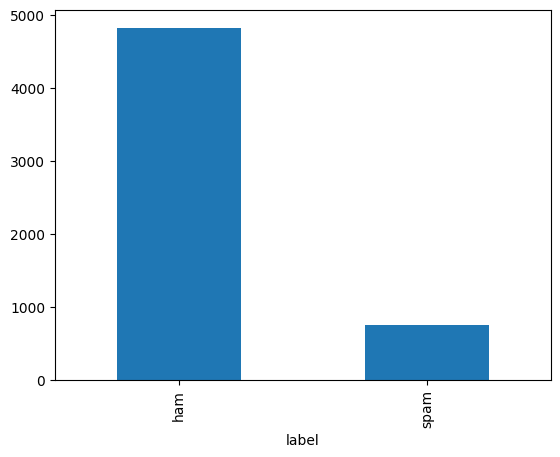

In [12]:
df.label.value_counts().plot(kind='bar')

In [13]:
df.isnull().value_counts()

,,count
label,message,
False,False,5568


**2. Data Preparation-Pre-processing text data**

**2.1 Remove punctuation**

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# define punctuation
punctuation=string.punctuation
text='Hello!!!, I love NLP, will use python in our code.'

no_punctuation=""
for char in text:
  if char not in punctuation:
    no_punctuation=no_punctuation+char
print(no_punctuation)

Hello I love NLP will use python in our code


In [16]:
def remove_punctuation(text):
  text_no_punctuation = "".join([char for char in text if char not in string.punctuation ])
  return text_no_punctuation

df['message_no_punctuation']=df['message'].apply(lambda x:remove_punctuation(x))
df.head()

,label,message,message_no_punctuation
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


**2.2 Converting text to lowercase**

In [17]:
def remove_punctuation(text):
  text_no_punctuation = "".join([char for char in text if char not in string.punctuation ])
  return text_no_punctuation

df['message_no_punctuation']=df['message'].apply(lambda x:remove_punctuation(x.lower()))
df.head()

,label,message,message_no_punctuation
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will


**2.3 Tokenization**

In [18]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
import re
#\W+ regex, indicates that it will split wherever it sees one or more non-word characters.
#So that'll split on white spaces, special characters, anything like that.

text='I love NLP,will use python in our code.'
tokens = re.split('\W+', text)
tokens

['I', 'love', 'NLP', 'will', 'use', 'python', 'in', 'our', 'code', '']

In [20]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

df['message_tokenized']=df['message_no_punctuation'].apply(lambda x:tokenize(x))
df.head()

,label,message,message_no_punctuation,message_tokenized
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"


**2.4 Remove stopwords**

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
stopwords_eng = stopwords.words('english')
# stopwords_eng

In [23]:
def remove_stopwords(tekonize_list):
  text = [word for word in tekonize_list if word not in stopwords_eng]
  return text

df['message_no_stopwords'] = df['message_tokenized'].apply(lambda x:remove_stopwords(x))
df.head()

,label,message,message_no_punctuation,message_tokenized,message_no_stopwords
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


**2.5 Using Stemming**

In [24]:
ps = nltk.PorterStemmer()
# dir(ps)

In [25]:
print(ps.stem('play'))
print(ps.stem('playing'))
print(ps.stem('played'))
print(ps.stem('plays'))

play
play
play
play


In [26]:
#Over-steaming occurs when two words are stemmed from the same root of different stems.
print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))

univers
univers
univers


In [27]:
#Under-stemming occurs when two words are stemmed from the same root of not a different stems
print(ps.stem('alumnus'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumnu
alumni
alumna


In [28]:
def stemming(tokenize_text):
  text = [ps.stem(word) for word in tokenize_text]
  return text

df['message_stemmed'] = df['message_no_stopwords'].apply(lambda x:stemming(x))
df.head()

,label,message,message_no_punctuation,message_tokenized,message_no_stopwords,message_stemmed
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


**2.6 Using Lemmatizer**

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
wn = nltk.WordNetLemmatizer()
# dir(wn)

In [31]:
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universe'))

universal
university
universe


In [32]:
print(wn.lemmatize('alumnus'))
print(wn.lemmatize('alumni'))
print(wn.lemmatize('alumnae'))

alumnus
alumnus
alumna


In [33]:
def lemmatization(tokenize_text):
  text = [wn.lemmatize(word) for word in tokenize_text]
  return text

df['message_lemmatized'] = df['message_no_stopwords'].apply(lambda x:lemmatization(x))
df.head()

,label,message,message_no_punctuation,message_tokenized,message_no_stopwords,message_stemmed,message_lemmatized
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


**Create function to remove punctuation, tokenize, remove stopwords, and stem**

In [34]:
def clean_text(text):
  text_no_punctuation = "".join([char for char in text if char not in string.punctuation ])
  tokens = word_tokenize(text_no_punctuation.lower())
  text_stopwords = [word for word in tokens if word not in stopwords_eng]
  text = [ps.stem(word) for word in text_stopwords]
  # Join the stemmed words back into a single string
  return " ".join(text)

df = df[['label','message']]
df['message_cleaned'] = df['message'].apply(lambda x:clean_text(x)) # Remove .lower() here
df.head()

,label,message,message_cleaned
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


**3. Vectorizing text data**

In [35]:
sentences = ["good move", "good move", "not a good move", "did not like", "horrible movie", "good one"]

**3.1. Count Vectorization**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(sentences)
print(features_cv.shape)
print('Sparse Matrix')
print(features_cv)
print('Dense Matrix')
print(features_cv.toarray())
features_cv = pd.DataFrame(features_cv.toarray(), columns=vectorizer.get_feature_names_out())
features_cv

(6, 8)
Sparse Matrix
  (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (2, 1)	1
  (2, 4)	1
  (2, 6)	1
  (3, 6)	1
  (3, 0)	1
  (3, 3)	1
  (4, 2)	1
  (4, 5)	1
  (5, 1)	1
  (5, 7)	1
Dense Matrix
[[0 1 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 1 0 0 1 0 1 0]
 [1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0]
 [0 1 0 0 0 0 0 1]]


,did,good,horrible,like,move,movie,not,one
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,0,1


3.2. Vectorizing Data:N-Grams

In [37]:
ngram_vectorizer = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vectorizer.fit_transform(sentences)
print(features_ngram.shape)
print('Sparse Matrix')
print(features_ngram)
print('Dense Matrix')
print(features_ngram.toarray())
features_ngram = pd.DataFrame(features_ngram.toarray(), columns=ngram_vectorizer.get_feature_names_out())
features_ngram

(6, 16)
Sparse Matrix
  (0, 3)	1
  (0, 9)	1
  (0, 4)	1
  (1, 3)	1
  (1, 9)	1
  (1, 4)	1
  (2, 3)	1
  (2, 9)	1
  (2, 4)	1
  (2, 11)	1
  (2, 12)	1
  (2, 13)	1
  (3, 11)	1
  (3, 0)	1
  (3, 8)	1
  (3, 1)	1
  (3, 14)	1
  (3, 2)	1
  (4, 6)	1
  (4, 10)	1
  (4, 7)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
Dense Matrix
[[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
 [1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1]]


,did,did not,did not like,good,good move,good one,horrible,horrible movie,like,move,movie,not,not good,not good move,not like,one
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0
3,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


**3.3. Vectorizing Data: TF-IDF**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
features_tfidf = tfidf_vectorizer.fit_transform(sentences)
print(features_tfidf.shape)
print('Sparse Matrix')
print(features_tfidf)
print('Dense Matrix')
print(features_tfidf.toarray())
features_tfidf = pd.DataFrame(features_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
features_tfidf

(6, 14)
Sparse Matrix
  (0, 2)	0.5182242665631911
  (0, 8)	0.6047493735197427
  (0, 3)	0.6047493735197427
  (1, 2)	0.5182242665631911
  (1, 8)	0.6047493735197427
  (1, 3)	0.6047493735197427
  (2, 2)	0.34349450355969513
  (2, 8)	0.40084592567004146
  (2, 3)	0.40084592567004146
  (2, 10)	0.4747847685072652
  (2, 11)	0.5789957144618917
  (3, 10)	0.37935894668725584
  (3, 0)	0.4626247911559474
  (3, 7)	0.4626247911559474
  (3, 1)	0.4626247911559474
  (3, 12)	0.4626247911559474
  (4, 5)	0.5773502691896257
  (4, 9)	0.5773502691896257
  (4, 6)	0.5773502691896257
  (5, 2)	0.3868386046677293
  (5, 13)	0.6520567053327203
  (5, 4)	0.6520567053327203
Dense Matrix
[[0.         0.         0.51822427 0.60474937 0.         0.
  0.         0.         0.60474937 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.51822427 0.60474937 0.         0.
  0.         0.         0.60474937 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.3434945  0.40084593 0.  

,did,did not,good,good move,good one,horrible,horrible movie,like,move,movie,not,not good,not like,one
0,0.000000,0.000000,0.518224,0.604749,0.000000,0.00000,0.00000,0.000000,0.604749,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.518224,0.604749,0.000000,0.00000,0.00000,0.000000,0.604749,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.343495,0.400846,0.000000,0.00000,0.00000,0.000000,0.400846,0.00000,0.474785,0.578996,0.000000,0.000000
3,0.462625,0.462625,0.000000,0.000000,0.000000,0.00000,0.00000,0.462625,0.000000,0.00000,0.379359,0.000000,0.462625,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.386839,0.000000,0.652057,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.652057


**3.4. Vectorizing text Data**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
features_tfidf = tfidf_vectorizer.fit_transform(df['message_cleaned'])
print(features_tfidf.shape)
print('Sparse Matrix')
print(features_tfidf)
print('Dense Matrix')
print(features_tfidf.toarray())
features_tfidf = pd.DataFrame(features_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
features_tfidf

(5568, 39383)
Sparse Matrix
  (0, 17835)	0.12037517312563514
  (0, 29274)	0.14567875539406702
  (0, 28367)	0.11530279782922896
  (0, 38126)	0.12651922303855667
  (0, 33398)	0.11268679311197824
  (0, 5528)	0.20050568521550277
  (0, 27138)	0.32056688874709177
  (0, 38069)	0.12570282543172512
  (0, 32700)	0.10241830971302086
  (0, 15818)	0.12610731313243928
  (0, 14807)	0.20050568521550277
  (0, 13197)	0.20050568521550277
  (0, 38038)	0.13325610898927823
  (0, 5101)	0.16437628255522793
  (0, 34180)	0.09438310868490304
  (0, 17867)	0.20050568521550277
  (0, 29287)	0.20050568521550277
  (0, 28417)	0.20050568521550277
  (0, 38151)	0.20050568521550277
  (0, 33404)	0.20050568521550277
  (0, 5529)	0.20050568521550277
  (0, 27150)	0.20050568521550277
  (0, 38101)	0.20050568521550277
  (0, 32735)	0.20050568521550277
  (0, 15833)	0.20050568521550277
  :	:
  (5566, 10924)	0.16521656126040007
  (5566, 13392)	0.18639008187610343
  (5566, 15078)	0.1413794376448494
  (5566, 16935)	0.15884990989929365
 

,008704050406,008704050406 sp,0089mi,0089mi last,0121,0121 2025050,01223585236,01223585236 xx,01223585334,01223585334 cum,...,zouk,zouk nichol,zyada,zyada kisi,üll,üll finish,üll submit,üll take,〨ud,〨ud even
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4. Features Engineering**

**4.1. Create feature for the message length**

In [40]:
df['body_len'] = df['message'].apply(lambda x:len(x))
df.head()

,label,message,message_cleaned,body_len
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,35


**4.2. Create feature for percent of text that is punctuation**

In [41]:
import string

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

df['punct%'] = df['message'].apply(lambda x:count_punct(x))
df.head()

,label,message,message_cleaned,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...,196,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61,4.1
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,77,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,35,7.1


**4.3. Create feature for the percent of characters in capital letters**

In [42]:
import string

def count_capital(text):
  count = sum([1 for char in text if char.isupper()])
  return round(count/(len(text)), 3)*100

df['capital%'] = df['message'].apply(lambda x:count_capital(x))
df.head()

,label,message,message_cleaned,body_len,punct%,capital%
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...,196,2.5,1.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,4.7,6.5
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61,4.1,3.3
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,77,3.2,2.6
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,35,7.1,74.3


In [43]:
df.describe()

,body_len,punct%,capital%
count,5568.000000,5568.000000,5568.000000
mean,80.487428,7.097719,6.548402
std,59.950961,6.630779,10.913147
min,2.000000,0.000000,0.000000
25%,36.000000,3.300000,2.600000
50%,62.000000,5.500000,3.700000
75%,122.000000,9.100000,6.100000
max,910.000000,100.000000,100.000000


**4.4. Rescaling or standarization**

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
num_vars = ['body_len', 'punct%', 'capital%']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,label,message,message_cleaned,body_len,punct%,capital%
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...,0.213656,0.025,0.015
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.168502,0.047,0.065
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.064978,0.041,0.033
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,0.082599,0.032,0.026
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,0.036344,0.071,0.743


**5. Model Selection and Building**

In [46]:
target = df['label']
final_df = df.drop(['label','message','message_cleaned'], axis=1)

In [47]:
final_df = pd.concat([features_tfidf, final_df], axis=1)
final_df

,008704050406,008704050406 sp,0089mi,0089mi last,0121,0121 2025050,01223585236,01223585236 xx,01223585334,01223585334 cum,...,zyada kisi,üll,üll finish,üll submit,üll take,〨ud,〨ud even,body_len,punct%,capital%
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213656,0.025,0.015
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168502,0.047,0.065
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064978,0.041,0.033
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082599,0.032,0.026
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036344,0.071,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174009,0.061,0.056
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037445,0.034,0.028
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060573,0.146,0.035
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135463,0.010,0.016


In [48]:
target.head()

,label
0,ham
1,spam
2,ham
3,ham
4,ham


**Split Training and Testing Data Sets**

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4454, 39386)
(1114, 39386)
(4454,)
(1114,)


**Random Forest Algorithm**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [53]:
rf_model.score(X_test, y_test)

0.9784560143626571

**Cheking the feature_importances**

In [54]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.03309570972867366, 'body_len'),
 (0.021845123384343496, 'txt'),
 (0.020820976336200617, 'capital%'),
 (0.018353809513491116, 'call'),
 (0.013702168885718959, 'free'),
 (0.01361061176756265, 'claim'),
 (0.010361372742725354, 'tone'),
 (0.009022661716579648, 'mobil'),
 (0.008873027925910883, 'prize'),
 (0.007194907469726796, 'repli')]

**6. Model Evaluation: Accuracy & Confusion Matrix**

In [55]:
Accuracy = round(rf_model.score(X_test, y_test),2)
Accuracy

0.98

In [57]:
confusion_matrix(y_test, rf_model.predict(X_test))

array([[976,   0],
       [ 24, 114]])

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {}'.format(accuracy_score(y_test, rf_model.predict(X_test))))
print('Precision: {}'.format(precision_score(y_test, rf_model.predict(X_test), pos_label='spam')))
print('Recall: {}'.format(recall_score(y_test, rf_model.predict(X_test), pos_label='spam')))

Accuracy: 0.9784560143626571
Precision: 1.0
Recall: 0.8260869565217391
